In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import statistics
import math

# Importing CSV files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PSDV\ Assignment\ 3

/content/drive/MyDrive/PSDV Assignment 3


In [ ]:
data = pd.read_csv('Data.csv')
funding = pd.read_csv('NCAP_Funding.csv')
state = pd.read_csv('State_data.csv')

In [ ]:
# Creating new column which contains column timestamp in datetime64 format
data['date'] = pd.to_datetime(data['Timestamp'])

In [ ]:
# Creating new columns with funding amount values in float
funding['2019-20'] = pd.to_numeric(funding['Amount released during FY 2019-20'], errors = 'coerce').fillna(0)
funding['2020-21'] = pd.to_numeric(funding['Amount released during FY 2020-21'], errors = 'coerce').fillna(0)
funding['2021-22'] = pd.to_numeric(funding['Amount released during FY 2021-22'], errors = 'coerce').fillna(0)

# Spatial Aggregation

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [ ]:
# Finding average PM2.5 concentration and grouping by state
statewise_average = data.groupby('state')['PM2.5'].mean()

# Extracting state with highest average
state_max = statewise_average.idxmax()

print(f'State with highest average PM2.5 concentration: {state_max} with a value of {statewise_average[state_max]:.2f}')

State with highest average PM2.5 concentration: Delhi with a value of 104.10


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [ ]:
# Filtering data to contain dates from 2023
data_2023 = data[data['date'].dt.year == 2023]

# Creating a dataframe that contains datewise average PM2.5 levels for all stations in each station
statewise_datewise = pd.DataFrame(data_2023.groupby(['state','date'])['PM2.5'].mean()).reset_index()

# Finding state which has highest number of 300+ days
above_300_days = statewise_datewise.loc[statewise_datewise['PM2.5'] > 300].groupby('state')['PM2.5'].count()
max_level_state = above_300_days.idxmax()
print('State with highest number of hazardous PM2.5 level days:', max_level_state)

State with highest number of hazardous PM2.5 level days: Delhi


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

Variability refers to how spread out data points are in a dataset. It is used to measure how much the values in a dataset differ from each other. Some ways to measure variability include standard deviation, range and interquartile range.

In [ ]:
# Creating new dataframe containing dates from only 2023
bool_mask = (data['date'].dt.year == 2023)
values_2023 = data[bool_mask]

# Finding standard deviation of PM2.5 levels and extracting state with highest standard deviation
statewise_std_dev = values_2023.groupby('state')['PM2.5'].std()
state_stddev_max = statewise_std_dev.idxmax()

# Finding range of PM2.5 levels and extracting state with highest range
statewise_range = values_2023.groupby('state')['PM2.5'].max() - values_2023.groupby('state')['PM2.5'].min()
state_range_max = statewise_range.idxmax()

# Finding interquartile range of PM2.5 levels and extracting state with highest interquartile range
statewise_IQR = values_2023.groupby('state')['PM2.5'].quantile(0.75) - values_2023.groupby('state')['PM2.5'].quantile(0.25)
state_IQR_max = statewise_IQR.idxmax()

print('State with the highest standard deviation:', state_stddev_max)
print('State with the highest range:', state_range_max)
print('State with the highest interquartile range:', state_IQR_max)

State with the highest standard deviation: Delhi
State with the highest range: Delhi
State with the highest interquartile range: Delhi


Delhi has the highest variability across all measuring factors.

4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [ ]:
# Creating new dataframe containing dates between 2020 and 2021
bool_mask = (data['date'].dt.year == 2020) | (data['date'].dt.year == 2021)
between_20_and_21 = data[bool_mask]

# Finding average PM2.5 levels
statewise_avg = between_20_and_21.groupby('state')['PM2.5'].mean()

# Extracting state with lowest average
lowest_avg = statewise_avg.idxmin()

print('State with lowest PM2.5 levels over the COVID period:', lowest_avg, 'with a value of', round(statewise_avg[lowest_avg],2))

State with lowest PM2.5 levels over the COVID period: Mizoram with a value of 14.32


# Temporal Aggregation

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [ ]:
# Creating new dataframe containing dates from August 2020
bool_mask = (data['date'].dt.month == 8) & (data['date'].dt.year == 2020)
aug_2020 = data[bool_mask]

# Finding station with highest value of PM2.5
aug_2020.set_index('station', inplace = True)
highest_value = aug_2020['PM2.5'].idxmax()
print('Station with highest value of PM2.5 in August 2020:', highest_value)

Station with highest value of PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identify the season with the highest pollution.</br>
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [ ]:
# Creating dataframe for summer
summer_month = data[(data['date'].dt.month.isin([3,4,5])) & (data['date'].dt.year == 2018)]
summer_pm25_avg = summer_month.groupby('station')['PM2.5'].mean()
print('Summer:', summer_pm25_avg['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'])

# Creating dataframe for monsoon
monsoon_month = data[(data['date'].dt.month.isin([6,7,8,9])) & (data['date'].dt.year == 2018)]
monsoon_pm25_avg = monsoon_month.groupby('station')['PM2.5'].mean()
print('Monsoon:', monsoon_pm25_avg['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'])

# Creating dataframe for winter
winter_month = data[(data['date'].dt.month.isin([12,1,2])) & (data['date'].dt.year == 2018)]
winter_pm25_avg = winter_month.groupby('station')['PM2.5'].mean()
print('Winter:', winter_pm25_avg['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'])

print('Clearly, winter has the highest average PM2.5 concentration.')

Summer: nan
Monsoon: 34.42519611317571
Winter: 67.4923443634478
Clearly, winter has the highest average PM2.5 concentration.


In winter, colder air traps pollutants closer to the ground, and increased heating from coal raises PM2.5 levels. However, summer and monsoon see lower PM2.5 levels due to stronger winds clearing out pollutants, rains and lowered heating related emissions in summer.

3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021.</br>
Create a plot to show these trends:</br>
Calculate the monthly average PM2.5 for weekdays and weekends separately</br>
X-axis: Months (January to December).</br>
Y-axis: Average PM2.5 levels.</br>
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


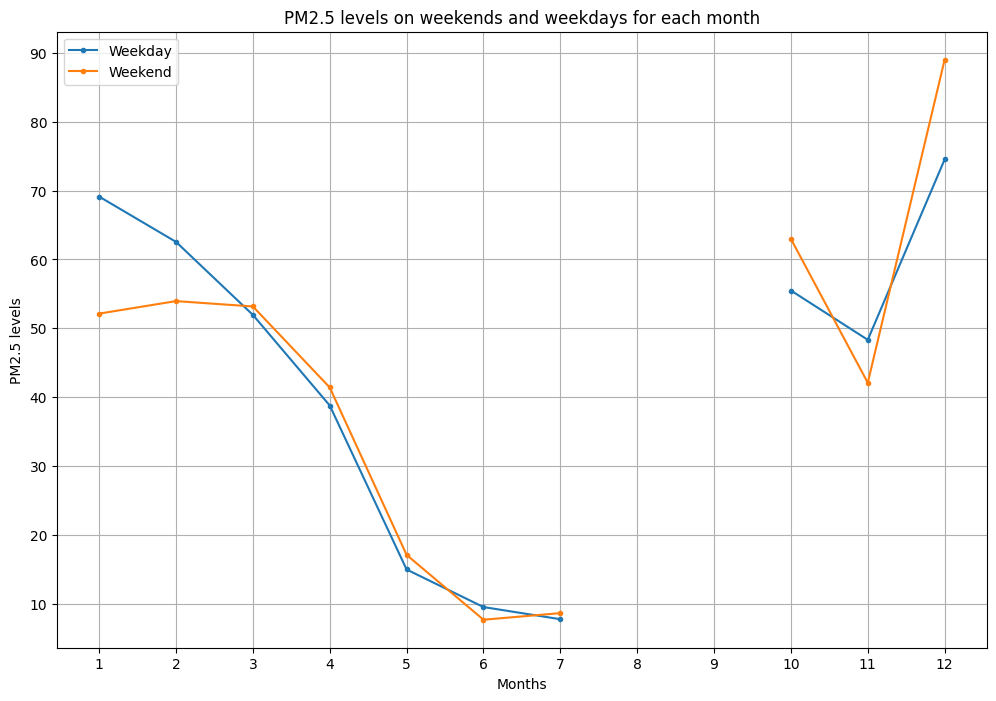

In [ ]:
# Creating dataframe with values of station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB and date of year 2021
bool_mask = (data['date'].dt.year == 2021) &(data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')
lbsn_2021 = data[bool_mask].copy()

# Creating new column to identify weekday and weekend
lbsn_2021['Weekday'] = (lbsn_2021['date'].dt.weekday) < 5

# Finding values of PM2.5 levels on weekdays and weekends for each month
weekday_values = []
for i in range(1,13):
  weekday_values.append(lbsn_2021.loc[(lbsn_2021['Weekday'] == True) & (lbsn_2021['date'].dt.month == i)]['PM2.5'].mean())

weekend_values = []
for i in range(1,13):
  weekend_values.append(lbsn_2021.loc[(lbsn_2021['Weekday'] == False) & (lbsn_2021['date'].dt.month == i)]['PM2.5'].mean())

# Plotting graph
plt.figure(figsize = (12,8))
plt.plot(np.arange(1,13), weekday_values, marker = '.', label = 'Weekday')
plt.plot(np.arange(1,13), weekend_values, marker = '.', label = 'Weekend')
plt.xticks(np.arange(1,13))
plt.xlabel('Months')
plt.ylabel('PM2.5 levels')
plt.title('PM2.5 levels on weekends and weekdays for each month')
plt.grid(True)
plt.legend()
plt.show()


# Spatio-temporal Aggregation

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [ ]:
# Filtering dates for summer and monsoon in 2022 and finding PM2.5 level for each season
summer_2022 = pd.DataFrame(data[(data['date'].dt.month.isin([3,4,5])) & (data['date'].dt.year == 2022)].groupby('state')['PM2.5'].mean()).reset_index()
monsoon_2022 = pd.DataFrame(data[(data['date'].dt.month.isin([6,7,8,9])) & (data['date'].dt.year == 2022)].groupby('state')['PM2.5'].mean()).reset_index()

# Finding percentage change in PM2.5 levels
percentage_diff = abs(100*(monsoon_2022['PM2.5'] - summer_2022['PM2.5'])/summer_2022['PM2.5'])
index_max = percentage_diff.idxmax()
print('State with most difference in the year 2022:', summer_2022.iloc[index_max]['state'])

State with most difference in the year 2022: Assam


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

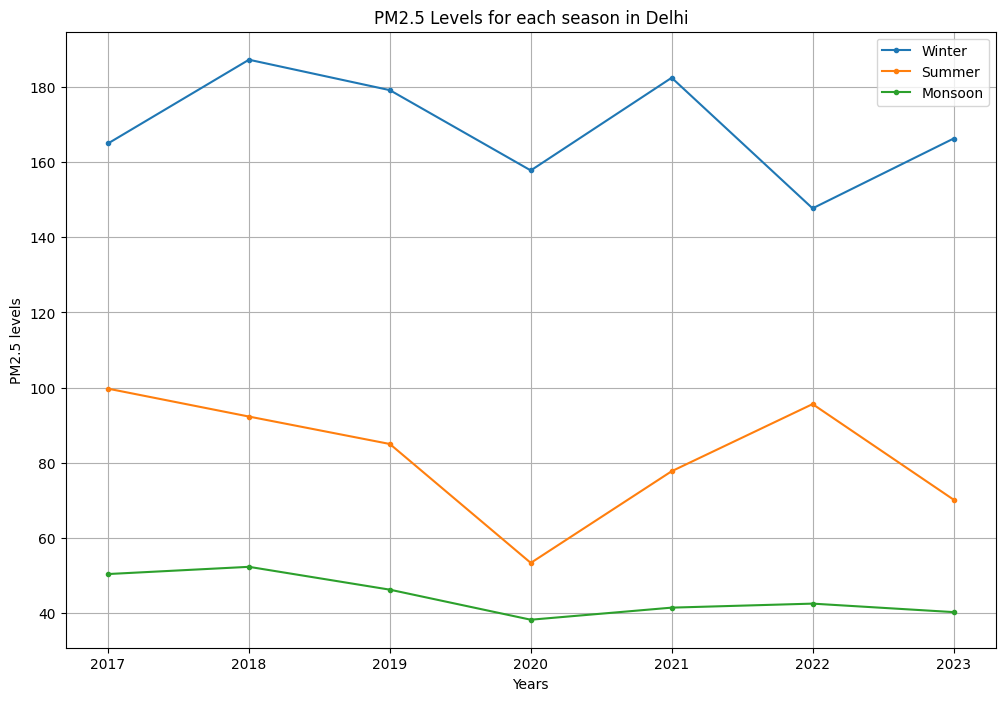

In [ ]:
# Extracting data that has Delhi as state and date from 2017 to 2023 and finding mean of PM2.5 levels for each day
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
bool_mask = (data['state'] == 'Delhi') & (data['date'].dt.year.isin(years))
delhi_data = pd.DataFrame(data.loc[bool_mask].groupby('date')['PM2.5'].mean()).reset_index()

# Finding PM2.5 levels for each season
winter_levels = []
summer_levels = []
monsoon_levels = []

for year in years:
  # Extracting values for winter for each year
  bool_mask = ((delhi_data['date'].dt.month.isin([12,1,2])) & (delhi_data['date'].dt.year == year))
  winter_vals = delhi_data.loc[bool_mask]['PM2.5'].mean()
  winter_levels.append(winter_vals)

  # Extracting values for summer for each year
  bool_mask = ((delhi_data['date'].dt.month.isin([3,4,5])) & (delhi_data['date'].dt.year == year))
  summer_vals = delhi_data.loc[bool_mask]['PM2.5'].mean()
  summer_levels.append(summer_vals)

  # Extracting values for monsoon for each year
  bool_mask = ((delhi_data['date'].dt.month.isin([6,7,8,9])) & (delhi_data['date'].dt.year == year))
  monsoon_vals = delhi_data.loc[bool_mask]['PM2.5'].mean()
  monsoon_levels.append(monsoon_vals)

# Plotting graph
plt.figure(figsize = (12,8))
plt.plot(years, winter_levels, marker = '.', label = 'Winter')
plt.plot(years, summer_levels, marker = '.', label = 'Summer')
plt.plot(years, monsoon_levels, marker = '.', label = 'Monsoon')
plt.title('PM2.5 Levels for each season in Delhi')
plt.xlabel('Years')
plt.ylabel('PM2.5 levels')
plt.legend()
plt.grid(True)
plt.show()

Clearly, the average PM2.5 levels in winter are much higher than the levels in summer and monsoon.

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

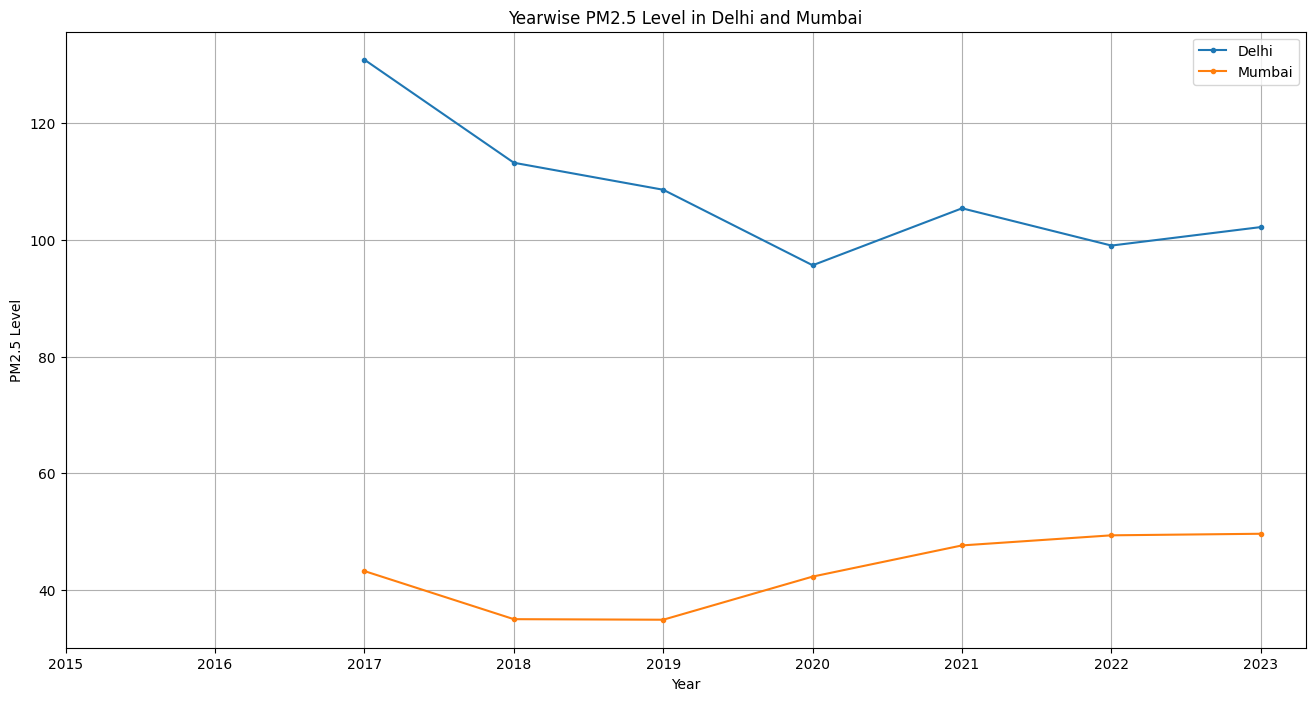

Standard deviation of Delhi: 11.717413923558434
Standard deviation of Mumbai: 6.271046653393213


In [53]:
years = np.arange(2015,2024)
delhi_data = []
mumbai_data = []

# Finding PM2.5 values for Delhi and Mumbai from 2015-2023
for year in years:
  delhi_val = data.loc[(data['city'] == 'Delhi') & (data['date'].dt.year == year)]['PM2.5'].mean()
  delhi_data.append(delhi_val)
  mumbai_val = data.loc[(data['city'] == 'Mumbai') & (data['date'].dt.year == year)]['PM2.5'].mean()
  mumbai_data.append(mumbai_val)

# Plotting graph
plt.figure(figsize = (16,8))
plt.plot(years, delhi_data, marker = '.', label = 'Delhi')
plt.plot(years, mumbai_data, marker = '.', label = 'Mumbai')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('Yearwise PM2.5 Level in Delhi and Mumbai')
plt.grid(True)
plt.legend()
plt.show()

# Finding fluctuation
delhi_sd = statistics.stdev([x for x in delhi_data if not math.isnan(x)])
mumbai_sd = statistics.stdev([x for x in mumbai_data if not math.isnan(x)])
print('Standard deviation of Delhi:', delhi_sd)
print('Standard deviation of Mumbai:', mumbai_sd)

A good way to measure fluctuation of values is to use methods of variability, such as standard deviation. Clearly, the standard deviation of Delhi is much higher than Mumbai, and hence, Delhi has the higher fluctuation.

# Population Based

1. Which state in India has the highest number of monitoring stations relative to its population?

In [ ]:
# Finding total stations relative to population in each state
total_stations = pd.DataFrame(data.groupby('state')['station'].count())
merged_df = pd.merge(total_stations, state, left_on = 'state', right_on = 'State')
merged_df['Stations relative to population'] = merged_df['station']/merged_df['Population']

# Finding highest number of monitoring stations relative to its population
merged_df.set_index('State', inplace = True)
max_stations = merged_df['Stations relative to population'].idxmax()
print('State with highest number of monitoring stations relative to its population:', max_stations)

State with highest number of monitoring stations relative to its population: Chandigarh


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

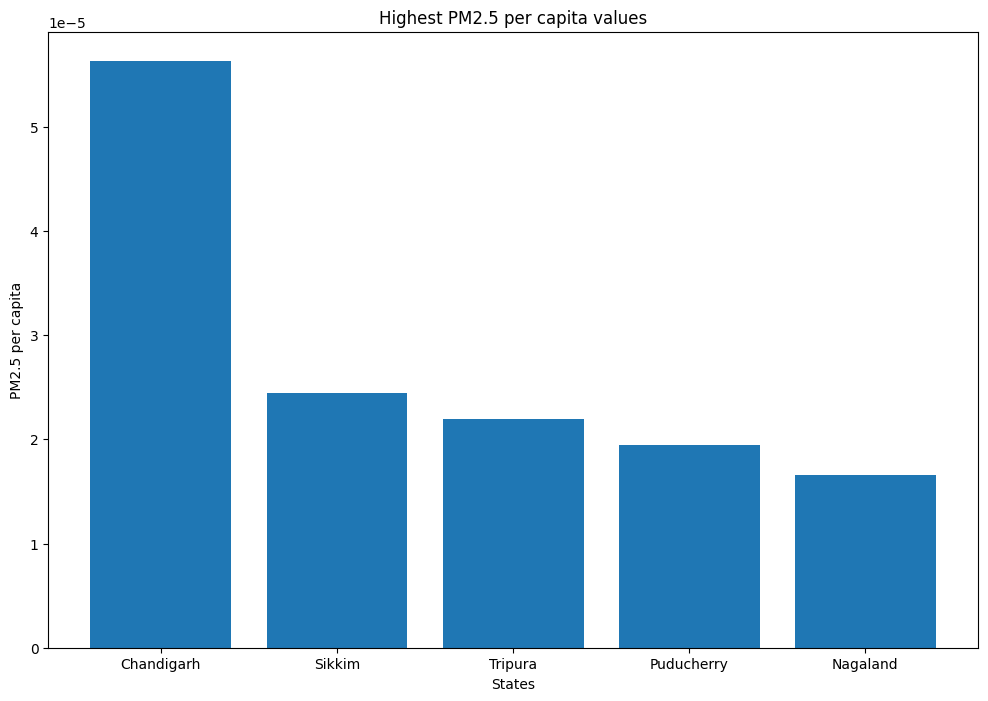

In [ ]:
# Creating dataframe to find statewise PM2.5 exposure per capita in 2023
data_2023 = data[data['date'].dt.year == 2023]
state_pm25 = pd.DataFrame(data_2023.groupby('state')['PM2.5'].mean())
merged_df = pd.merge(state_pm25, state, left_on = 'state', right_on = 'State')
merged_df['PM2.5 Per Capita'] = merged_df['PM2.5']/merged_df['Population']

# Extracting top 5 most polluted states
top5_polluted = merged_df.sort_values('PM2.5 Per Capita', ascending = False).head(5)

# Plotting bar graph
plt.figure(figsize = (12,8))
plt.bar(top5_polluted['State'], top5_polluted['PM2.5 Per Capita'])
plt.xlabel('States')
plt.ylabel('PM2.5 per capita')
plt.title('Highest PM2.5 per capita values')
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?</br>
X-axis: Population density (people per square kilometer)</br>
Y-axis: Average PM2.5 concentration</br>
Use a scatter plot to show the relationship, where each point represents a state.


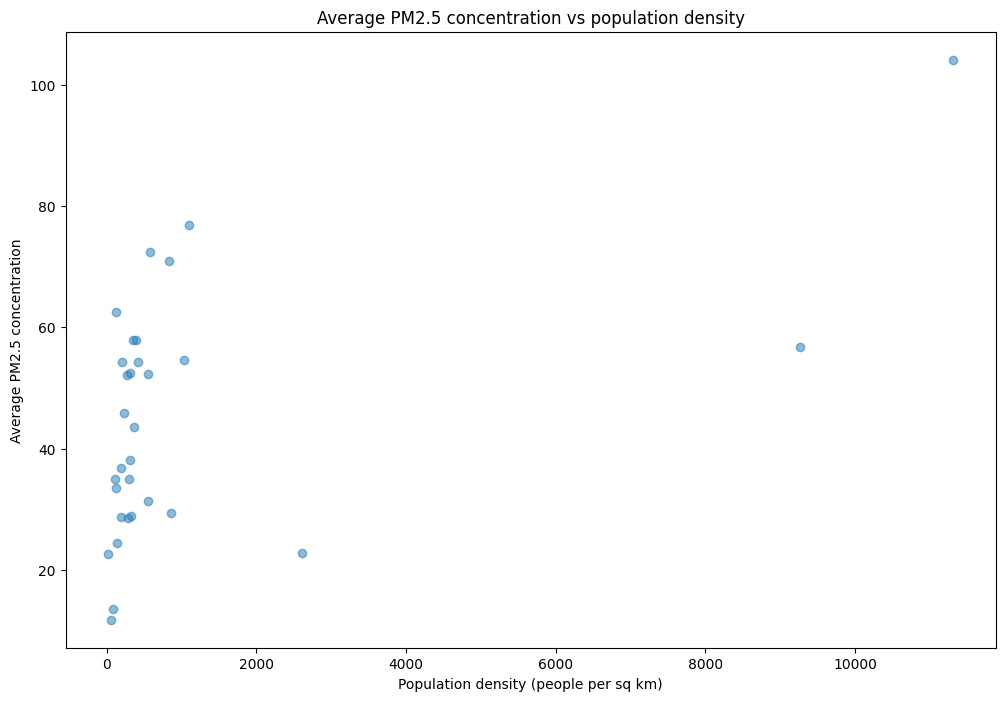

In [ ]:
# Creating dataframe to plot
avg_pm25 = pd.DataFrame(data.groupby('state')['PM2.5'].mean())
merged_df = pd.merge(avg_pm25, state, left_on = 'state', right_on = 'State')
merged_df['Population Density'] = merged_df['Population']/merged_df['Area (km2)']

# Plotting scatterplot
plt.figure(figsize = (12,8))
plt.scatter(merged_df['Population Density'], merged_df['PM2.5'], alpha = 0.5)
plt.ylabel('Average PM2.5 concentration')
plt.xlabel('Population density (people per sq km)')
plt.title('Average PM2.5 concentration vs population density')
plt.show()

The scatter plot suggests no strong correlation between population density and PM2.5 levels, as the data points are widely scattered. While few high density areas show high pollution, many low density areas also have high PM2.5 levels, indicating that other factors (such as industry zones, emissions etc.) play a major role. This suggests that population density alone does not determine pollution levels.

# Area Based

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.</br>
X-axis: States.</br>
Y-axis: PM2.5 concentration per square kilometer.</br>
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

State with highest PM2.5 concentration per square kilometer: Chandigarh 



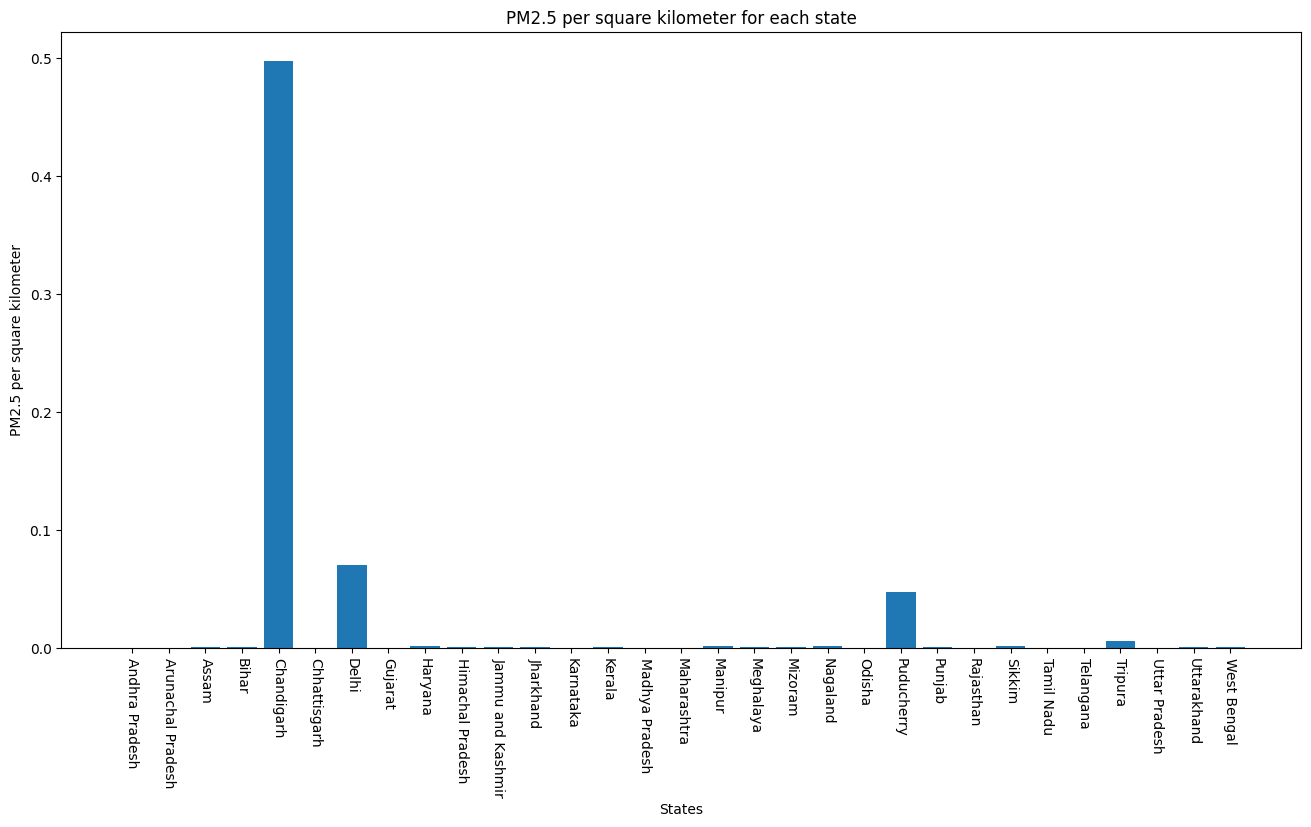

In [ ]:
# Creating new dataframe containing PM2.5 concentration per square kilometer
total_pm25 = pd.DataFrame(data.groupby('state')['PM2.5'].mean())
merged_df = pd.merge(total_pm25, state, left_on = 'state', right_on = 'State')
merged_df['PM2.5 per sq. km'] = merged_df['PM2.5']/merged_df['Area (km2)']

# Finding state with highest PM2.5 concentration per square kilometer
merged_df.set_index('State', inplace = True)
highest_conc = merged_df['PM2.5 per sq. km'].idxmax()
print('State with highest PM2.5 concentration per square kilometer:' ,highest_conc, '\n')

# Plotting bar graph
merged_df.reset_index(inplace = True)
plt.figure(figsize = (16,8))
plt.bar(merged_df['State'], merged_df['PM2.5 per sq. km'])
plt.xticks(rotation = -90)
plt.xlabel('States')
plt.ylabel('PM2.5 per square kilometer')
plt.title('PM2.5 per square kilometer for each state')
plt.show()

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

State with highest density of monitoring stations relative to its area: Delhi 



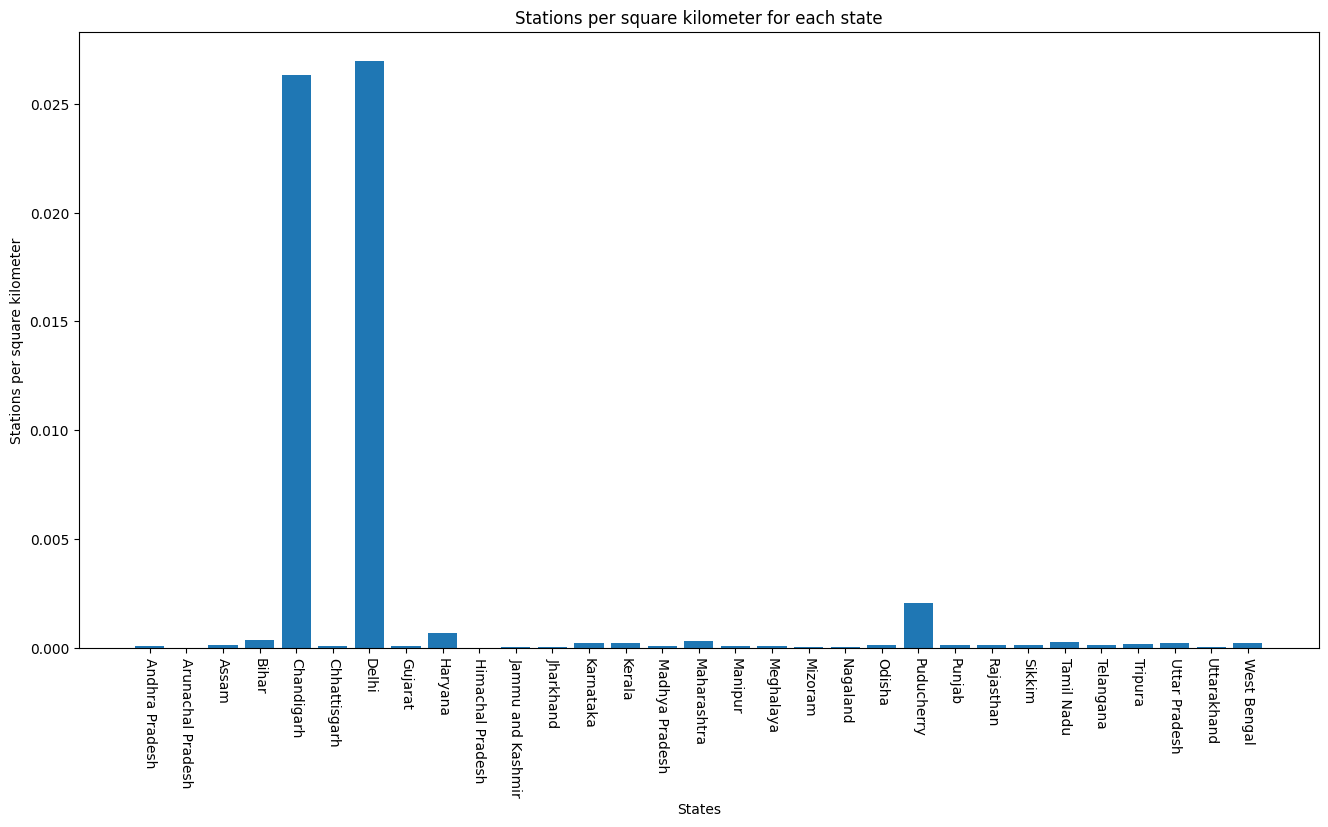

In [ ]:
# Creating new dataframe containing number of monitoring stations per square kilometer
no_of_stations = pd.DataFrame(data.groupby('state')['station'].nunique())
merged_df = pd.merge(no_of_stations, state, left_on = 'state', right_on = 'State')
merged_df['Stations per sq km'] = merged_df['station']/merged_df['Area (km2)']

# Finding state with highest density of monitoring stations relative to its area
merged_df.set_index('State', inplace = True)
highest_conc = merged_df['Stations per sq km'].idxmax()
print('State with highest density of monitoring stations relative to its area:', highest_conc, '\n')

# Plotting bar graph
merged_df.reset_index(inplace = True)
plt.figure(figsize = (16,8))
plt.bar(merged_df['State'], merged_df['Stations per sq km'])
plt.xticks(rotation = -90)
plt.xlabel('States')
plt.ylabel('Stations per square kilometer')
plt.title('Stations per square kilometer for each state')
plt.show()

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [ ]:
# Creating new dataframe containing dates from 2021
bool_mask = (data['date'].dt.year == 2021)
data_2021 = data[bool_mask]

# Finding average PM2.5 values for all states and extracting values for Maharashtra and Madhya Pradesh
pm25_levels_2021 = data_2021.groupby('state')['PM2.5'].mean()
print('Average PM2.5 levels in Maharashtra:', pm25_levels_2021['Maharashtra'])
print('Average PM2.5 levels in Madhya Pradesh:', pm25_levels_2021['Madhya Pradesh'])

# Finding population density
pop_density = state['Population']/state['Area (km2)']
print('Population density of Maharashtra:', pop_density[state[state['State'] == 'Maharashtra'].index.values[0]])
print('Population density of Madhya Pradesh:', pop_density[state[state['State'] == 'Madhya Pradesh'].index.values[0]])
print('Area of Maharashtra (km2):', state.loc[state['State'] == 'Maharashtra', 'Area (km2)'].values[0])
print('Area of Madhya Pradesh (km2):', state.loc[state['State'] == 'Madhya Pradesh', 'Area (km2)'].values[0])

Average PM2.5 levels in Maharashtra: 46.44004417107664
Average PM2.5 levels in Madhya Pradesh: 47.095951831498965
Population density of Maharashtra: 365.1920230864474
Population density of Madhya Pradesh: 235.60855728429985
Area of Maharashtra (km2): 307713
Area of Madhya Pradesh (km2): 308252


Maharashtra and Madhya Pradesh have similar area sizes. Although Maharashtra has a higher population density than Madhya Pradesh, its average PM2.5 level is similar to Madhya Pradesh. This suggests that population density does not drive pollution levels alone in these states. Since both states have similar land areas, the difference in PM2.5 levels indicate that pollution sources beyond population density must be considered.

# Funding Based

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [88]:
# Finding states that were funded and non funded in 2021
funding_2021 = pd.DataFrame(funding.groupby('State')['2021-22'].sum()).reset_index()
funding_2021 = funding_2021[funding_2021['2021-22'] != 0]
funded_states = funding_2021['State']
non_funded_states = data.loc[~data['state'].isin(funded_states), 'state'].dropna().unique()

# Finding average of funded and non funded states
funded_avg = data.loc[(data['state'].isin(funded_states)) & (data['date'].dt.year == 2021)]['PM2.5'].mean()
non_funded_avg = data.loc[(data['state'].isin(non_funded_states)) & (data['date'].dt.year == 2021)]['PM2.5'].mean()
print('Average PM2.5 level in funded states:', funded_avg)
print('Average PM2.5 level in non funded states:', non_funded_avg)

Average PM2.5 level in funded states: 65.35219325523295
Average PM2.5 level in non funded states: 55.346279326953784


2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

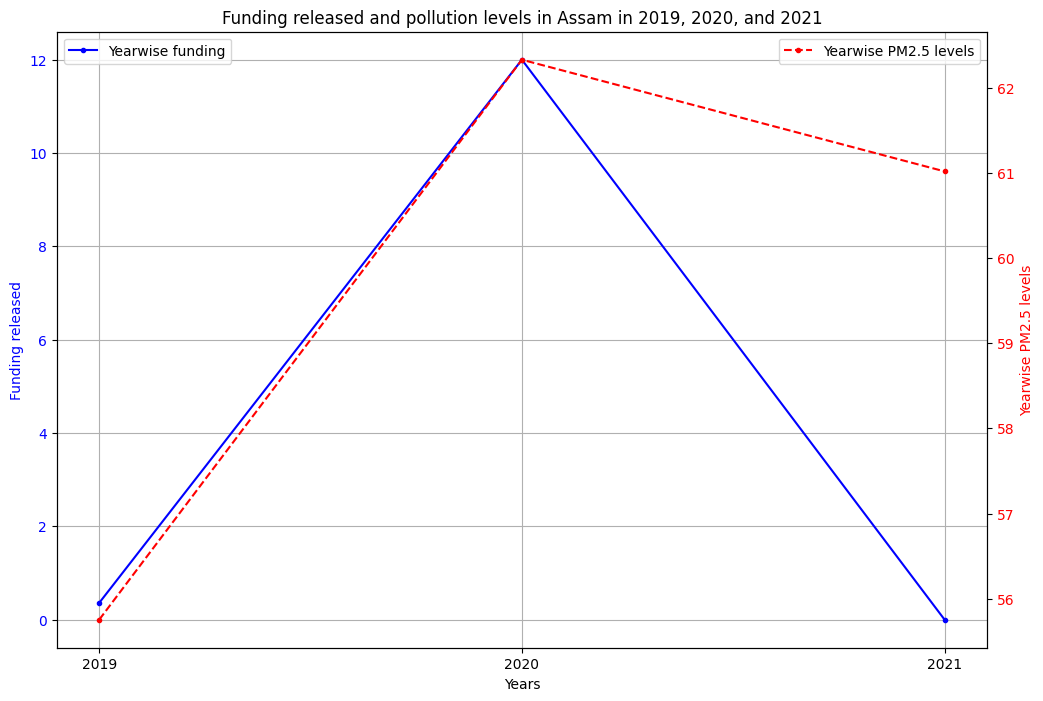

In [83]:
# Creating time series plot
years = [2019,2020,2021]
yearwise_funding = []
yearwise_pollution = []
for year in years:
  yearwise_funding.append(funding[f'{year}-{year+1-2000}'].loc[funding['State'] == 'Assam'].sum())
  yearwise_pollution.append(data[(data['date'].dt.year == year) & (data['state'] == 'Assam')]['PM2.5'].mean())
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(years, yearwise_funding, label = 'Yearwise funding', color = 'blue', marker = '.')
ax1.set_xlabel('Years')
ax1.set_ylabel('Funding released', color = 'blue')
ax2 = ax1.twinx()
ax2.plot(years, yearwise_pollution, label = 'Yearwise PM2.5 levels', color = 'red', linestyle = '--', marker = '.')
ax2.set_ylabel('Yearwise PM2.5 levels', color = 'red')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks(years)
ax1.grid(True)
plt.title('Funding released and pollution levels in Assam in 2019, 2020, and 2021')
plt.show()

From the graph, we see that the increment in the funding did not lead to improvements in air quality. In the year the NCAP funding increased significantly, the average PM2.5 level also increased significantly.

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

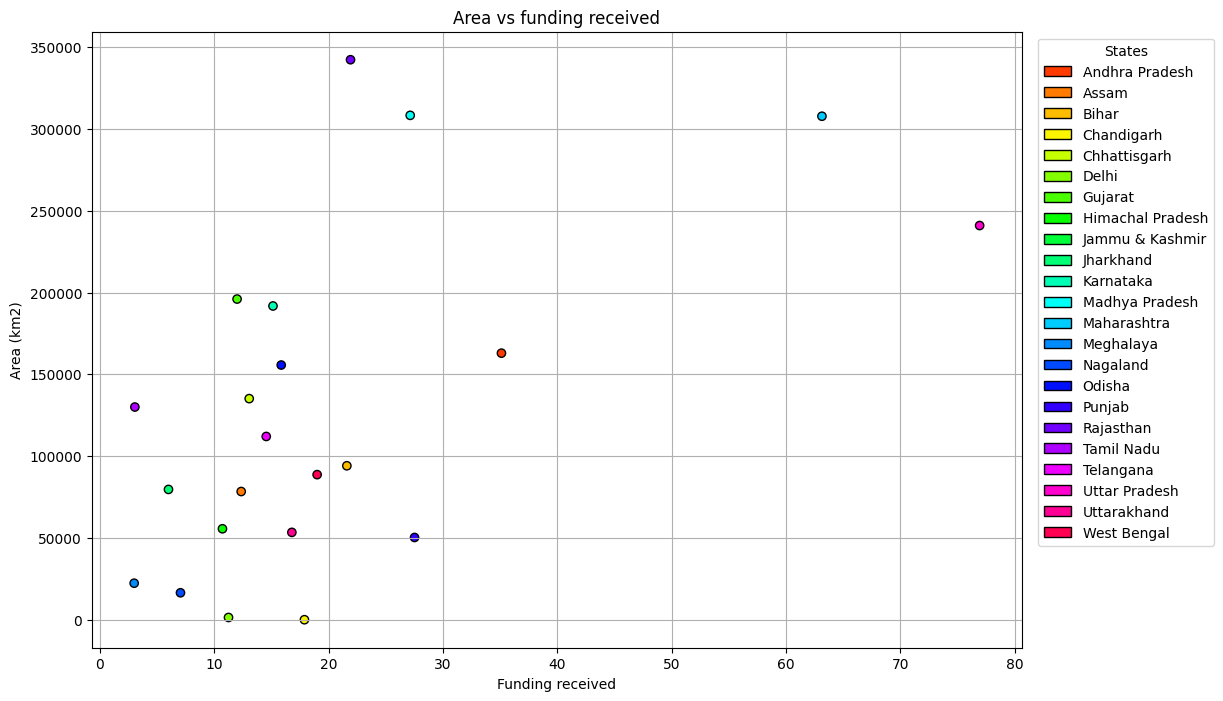

In [ ]:
# Creating dataframe to plot
statewise_funding = pd.DataFrame(funding.groupby('State')['Total fund released'].sum()).reset_index()
statewise_funding = pd.merge(statewise_funding, state[['State', 'Area (km2)']], on = 'State', how = 'left')

# Plotting scatterplot
colors = sns.color_palette("hsv", statewise_funding.shape[0]).as_hex()
state_color_map = dict(zip(statewise_funding['State'], colors))
plt.figure(figsize = (12,8))
plt.scatter(statewise_funding['Total fund released'], statewise_funding['Area (km2)'],
            c=[state_color_map[state] for state in statewise_funding['State']], edgecolors = 'black')
legend_patches = [mpatches.Patch(facecolor = color, label = state, edgecolor = 'black') for state, color in state_color_map.items()]
plt.legend(handles = legend_patches, title = "States", bbox_to_anchor = (1.01, 1))
plt.xlabel('Funding received')
plt.ylabel('Area (km2)')
plt.title('Area vs funding received')
plt.grid(True)
plt.show()

# Miscellaneous Questions

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [105]:
# Creating dataframe of days in 2023
data_2023 = data[(data['date'].dt.year == 2023)]

# Finding most polluted city
citywise_avg = data_2023.groupby('city')['PM2.5'].mean()
max_city = citywise_avg.idxmax()
print(f'Most polluted city in 2023: {max_city}')

# Calculating percentage
hazardous_days = data_2023.loc[(data_2023['city'] == max_city) & (data_2023['PM2.5'] >= 300)].groupby('Timestamp')['PM2.5'].mean()
total_days = data_2023.loc[data_2023['city'] == max_city].groupby('Timestamp').count()
percent = 100 * hazardous_days.shape[0]/total_days.shape[0]
print(f'Percentage of days in {max_city} with PM2.5 levels above hazardous threshold: {round(percent,2)}%')

Most polluted city in 2023: Darbhanga
Percentage of days in Darbhanga with PM2.5 levels above hazardous threshold: 0.82%


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

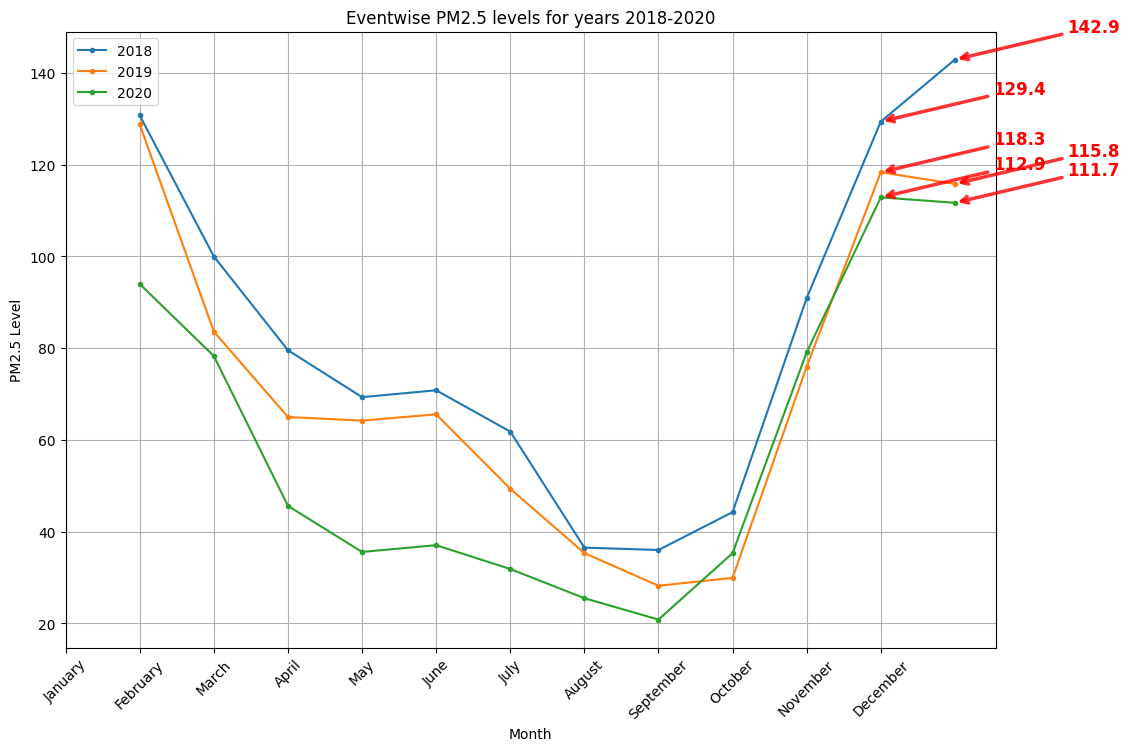

In [122]:
# Plotting graph
years = [2018, 2019, 2020]
plt.figure(figsize = (12,8))
for year in years:
  monthly_avg = data[data['date'].dt.year == year].groupby(data['date'].dt.month)['PM2.5'].mean()
  plt.plot(np.arange(1, 13), monthly_avg, label=str(year), marker='.')
  for i, val in enumerate(monthly_avg):
        if val > 100:
          if (i + 1) > 10:
            plt.annotate(f"{val:.1f}",
                         (i + 1, val),
                         textcoords = "offset points",
                         xytext = (100, 20),
                         ha = 'center',
                         fontsize = 12,
                         fontweight = 'bold',
                         color = 'red',
                         arrowprops = dict(arrowstyle = "->", linewidth = 2.5, color = 'red', alpha = 0.8))
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('Eventwise PM2.5 levels for years 2018-2020')
plt.xticks(np.arange(0, 12), ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December'], rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

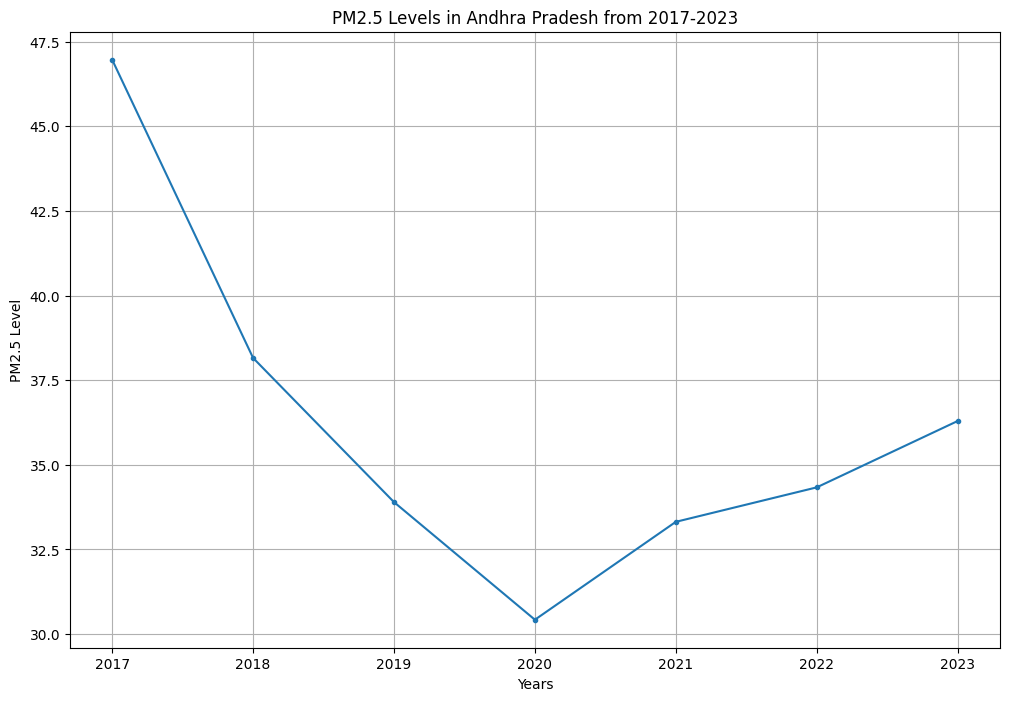

In [103]:
# Identifying state with highest NCAP funding in 2020
funding_2020 = funding.groupby('State')['2020-21'].sum()
highest_funded = funding_2020.idxmax()

years = np.arange(2017,2024)
levels = []
for year in years:
  pm25_level = data[(data['date'].dt.year == year) & (data['state'] == highest_funded)]['PM2.5'].mean()
  levels.append(pm25_level)

plt.figure(figsize = (12,8))
plt.plot(years, levels, marker = '.')
plt.xticks(years)
plt.title(f'PM2.5 Levels in {highest_funded} from 2017-2023')
plt.xlabel('Years')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.show()

The PM2.5 levels in Andhra Pradesh increased from 2020 to 2023.

4. Draw the map of India and plot the sensor locations on the map.

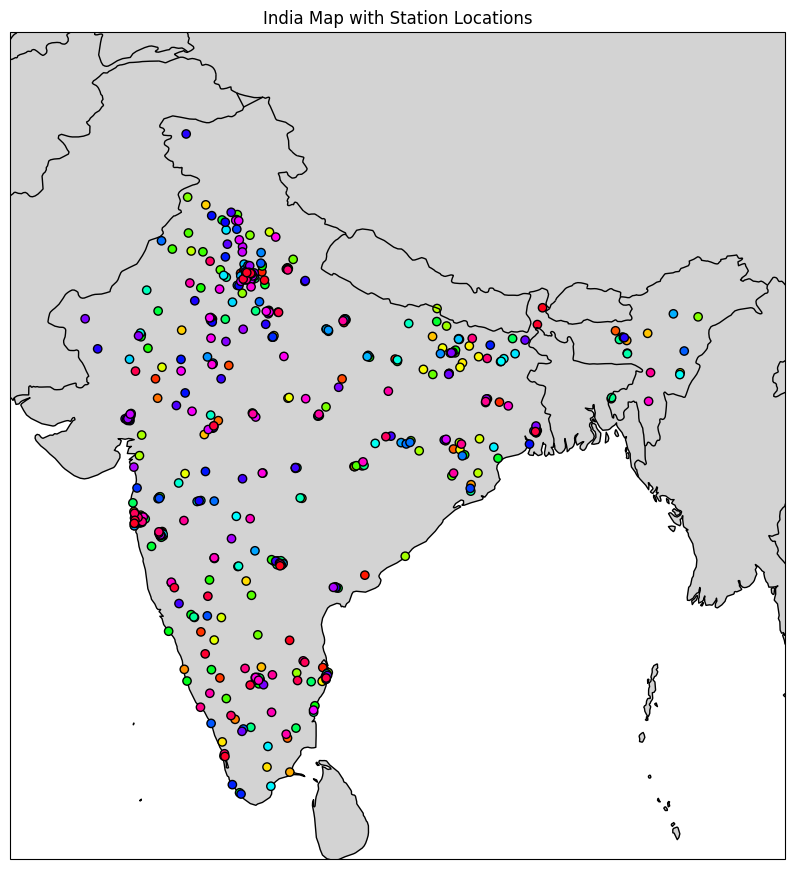

In [101]:
# Extracting geographical data of stations
geographical_data = data[['city', 'latitude', 'longitude', 'station']]
geographical_data = geographical_data.drop_duplicates(subset=['station'])

# Creating plot
fig, ax = plt.subplots(figsize = (10, 12), subplot_kw = {'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, edgecolor = "black", facecolor = "lightgray")
ax.add_feature(cfeature.BORDERS, edgecolor = "black")
ax.set_extent([68, 98, 6, 38], crs = ccrs.PlateCarree())
colors = sns.color_palette("hsv", geographical_data.shape[0])
ax.scatter(geographical_data['longitude'], geographical_data['latitude'],
           color = colors, marker = 'o',edgecolor = "black", transform = ccrs.PlateCarree())
plt.title("India Map with Station Locations")
plt.show()

# Tell Us Something New

1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

It would be interesting to analyze NCAP funding in relation to a state's population and pollution levels. As observed, funding does not seem to have a direct impact on reducing pollution levels. Understanding the reasons behind this is crucial to ensuring that resources are used efficiently and not wasted.